In [38]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [39]:
genes = ['gene' + str(i) for i in range(1, 101)]

wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

In [40]:
data = pd.DataFrame(columns = [*wt, *ko], index = genes)

In [41]:
for gene in data.index:
    data.loc[gene, 'wt1' : 'wt5'] = np.random.poisson(lam = rd.randrange(10, 1000), size = 5)
    data.loc[gene, 'ko1' : 'ko5'] = np.random.poisson(lam = rd.randrange(10, 1000), size = 5)

In [42]:
data = data.T
data

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene91,gene92,gene93,gene94,gene95,gene96,gene97,gene98,gene99,gene100
wt1,584,491,366,91,738,84,950,803,834,702,...,97,534,776,245,354,618,60,530,140,856
wt2,623,432,356,95,663,93,980,842,821,674,...,103,544,767,243,339,572,47,516,154,907
wt3,574,494,356,92,706,72,995,852,766,685,...,101,565,765,236,343,625,55,534,153,903
wt4,616,502,359,86,716,101,957,820,764,666,...,106,551,739,244,330,593,52,487,172,927
wt5,643,442,380,95,771,77,995,761,807,698,...,96,531,785,226,334,564,45,519,151,887
ko1,113,478,574,635,990,183,280,303,292,452,...,665,594,168,915,132,588,171,67,83,118
ko2,114,494,563,617,1008,205,277,319,227,436,...,651,602,164,912,135,593,204,51,80,111
ko3,105,532,586,633,971,172,265,313,270,485,...,635,594,179,885,141,556,173,71,57,114
ko4,101,530,564,634,999,183,271,304,254,474,...,622,593,180,876,145,579,180,45,86,114
ko5,111,470,566,611,992,176,257,310,264,498,...,646,574,181,865,134,606,186,57,85,110


In [44]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(data)
scaled_data

In [49]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

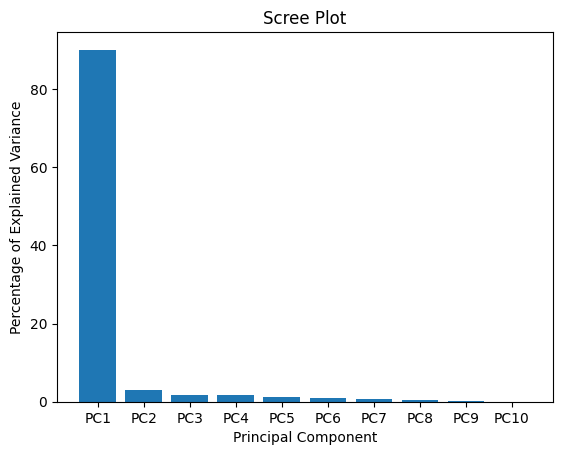

In [51]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x = range(1, len(per_var) + 1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()